<a href="https://colab.research.google.com/github/eefirefire/YoungDeveloperCamp-BankCustomerChurnPredictor/blob/main/BankCustomer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas
import joblib
dataset = pandas.read_csv('Customer-Churn-Records.csv')

dataset.info()

display(dataset.head())

dataset.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


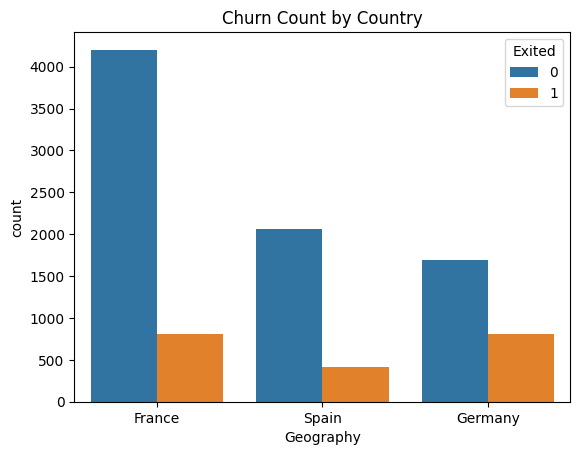

In [ ]:
import matplotlib.pyplot as plt
import seaborn

seaborn.countplot(data=dataset, x='Geography', hue='Exited')
plt.title('Churn Count by Country')

plt.show()

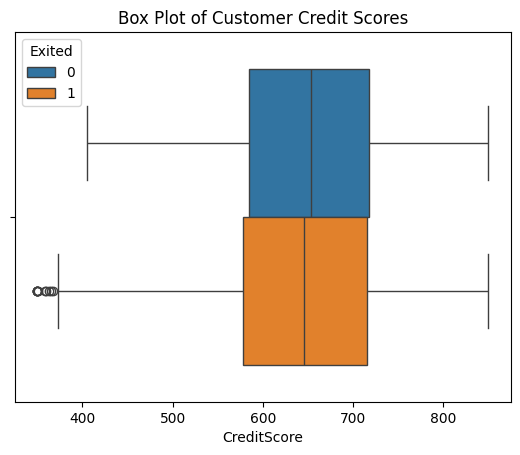

In [ ]:
seaborn.boxplot(data=dataset, x='CreditScore', hue = 'Exited')
plt.title('Box Plot of Customer Credit Scores')

plt.show()

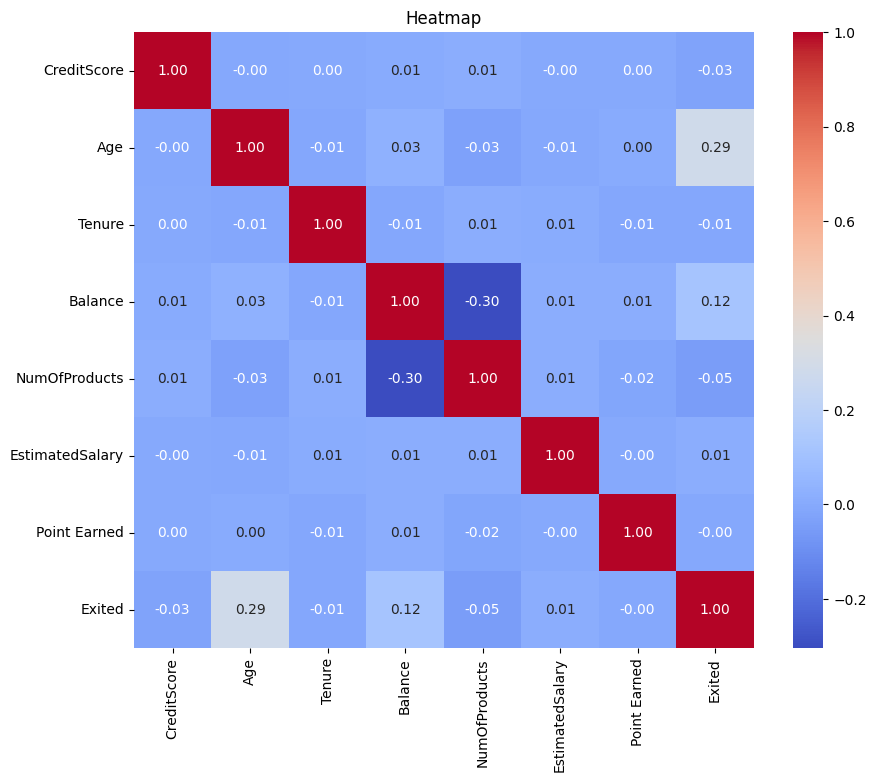

In [ ]:
numerical_cols = ['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary','Point Earned', 'Exited']

corr_matrix = dataset[numerical_cols].corr()

plt.figure(figsize=(10,8))

seaborn.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap')
plt.show()

Geography
France     0.161747
Germany    0.324432
Spain      0.166734
Name: Exited, dtype: float64


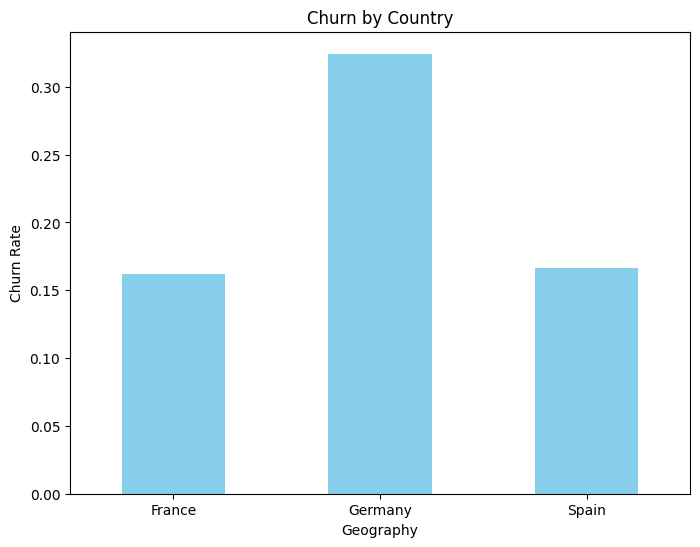

In [ ]:
churn_rate = dataset.groupby('Geography')['Exited'].mean()

print(churn_rate)

plt.figure(figsize=(8,6))
churn_rate.plot(kind='bar', color=['skyblue','skyblue','skyblue'])
plt.title('Churn by Country')
plt.ylabel('Churn Rate')
plt.xticks(rotation=0)
plt.show()

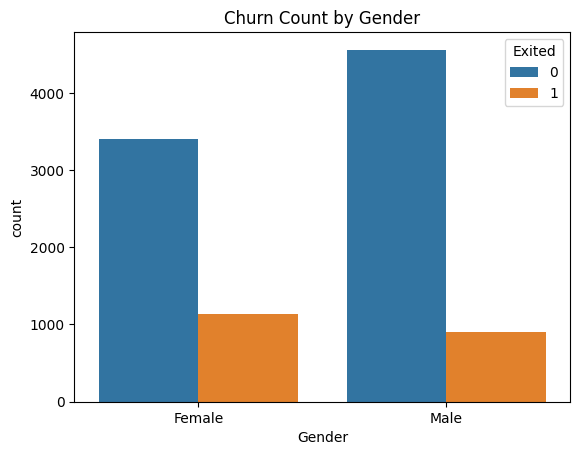

In [ ]:
seaborn.countplot(data=dataset, x='Gender', hue='Exited')
plt.title('Churn Count by Gender')

plt.show()

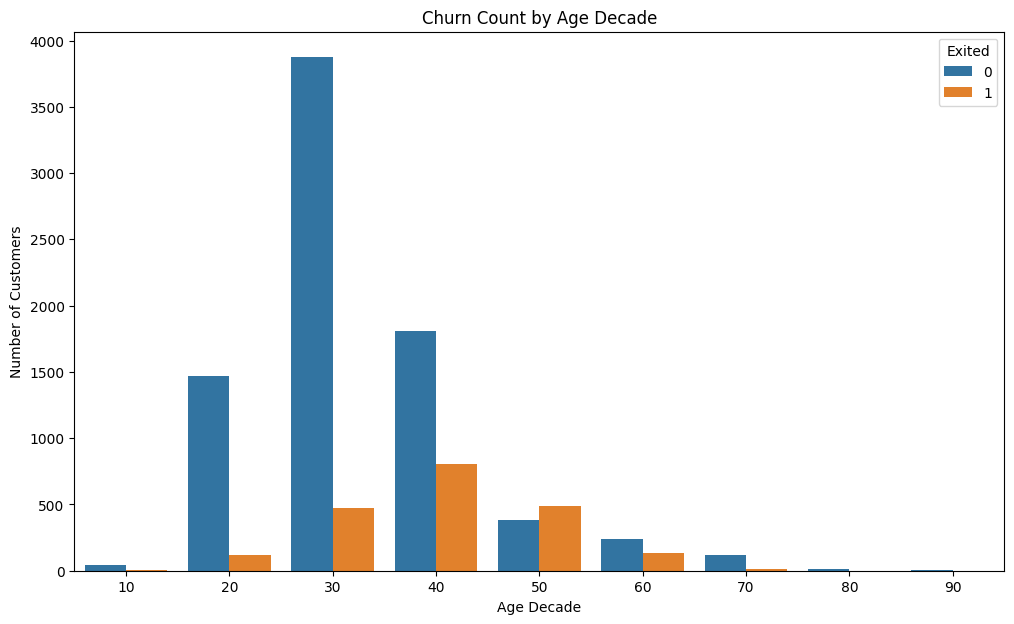

In [ ]:
dataset['AgeDecade'] = (dataset['Age'] // 10) * 10

plt.figure(figsize=(12, 7))

seaborn.countplot(data=dataset.sort_values('AgeDecade'), x='AgeDecade', hue='Exited')
plt.title('Churn Count by Age Decade')
plt.xlabel('Age Decade')
plt.ylabel('Number of Customers')

plt.show()

In [ ]:
print("Shape: ", dataset.shape)

dataset = pandas.get_dummies(data=dataset, columns=['Geography', 'Gender'], drop_first=True)
dataset = pandas.get_dummies(data=dataset, columns=['Card Type'], prefix='Card')

print("New Shape: ", dataset.shape)
display(dataset.head())

Shape:  (10000, 18)
New Shape:  (10000, 22)


,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,...,Complain,Satisfaction Score,Point Earned,Geography_Germany,Geography_Spain,Gender_Male,Card_DIAMOND,Card_GOLD,Card_PLATINUM,Card_SILVER
0,1,15634602,Hargrave,619,42,2,0.00,1,1,1,...,1,2,464,False,False,False,True,False,False,False
1,2,15647311,Hill,608,41,1,83807.86,1,0,1,...,1,3,456,False,True,False,True,False,False,False
2,3,15619304,Onio,502,42,8,159660.80,3,1,0,...,1,3,377,False,False,False,True,False,False,False
3,4,15701354,Boni,699,39,1,0.00,2,0,0,...,0,5,350,False,False,False,False,True,False,False
4,5,15737888,Mitchell,850,43,2,125510.82,1,1,1,...,0,5,425,False,True,False,False,True,False,False


In [ ]:
y = dataset['Exited']

x = dataset.drop(columns=['Exited', 'RowNumber', 'CustomerId', 'Surname', 'Complain', 'Satisfaction Score'])

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

print("train: ", x_train.shape)
print("test: ", x_test.shape)

train:  (8000, 16)
test:  (2000, 16)


In [ ]:
!pip install imbalanced-learn


from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

x_train_new, y_train_new = smote.fit_resample(x_train, y_train)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train_new)
x_test_scaled = scaler.transform(x_test)

joblib.dump(scaler, 'best_scaler.pkl')

['best_scaler.pkl']

In [ ]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(random_state=42)
LR.fit(x_train_scaled,y_train_new)


LogisticRegression(random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

y_predict = LR.predict(x_test_scaled)

accuracy = accuracy_score(y_test, y_predict)
print(f"Accuracy: {accuracy:.4f}")

print(f"Classification_report: {classification_report(y_test,y_predict)}")


Accuracy: 0.8015
Classification_report:               precision    recall  f1-score   support

           0       0.85      0.91      0.88      1592
           1       0.52      0.38      0.44       408

    accuracy                           0.80      2000
   macro avg       0.68      0.64      0.66      2000
weighted avg       0.78      0.80      0.79      2000



In [ ]:
#Change Model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(x_train_scaled, y_train_new)

y_pred_forest = rf_model.predict(x_test_scaled)

accuracy_forest = accuracy_score(y_test, y_pred_forest)
print(f"Accuracy: {accuracy_forest:.4f}")

print(classification_report(y_test, y_pred_forest))

Accuracy: 0.8535
              precision    recall  f1-score   support

           0       0.90      0.91      0.91      1592
           1       0.65      0.62      0.63       408

    accuracy                           0.85      2000
   macro avg       0.78      0.77      0.77      2000
weighted avg       0.85      0.85      0.85      2000



In [ ]:
#AdjustRandomForest As it is better than logistic regression

import joblib
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300],
    'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100,None],
    'min_samples_split': [2, 5, 10, 15 , 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70],
    'min_samples_leaf': [1, 2, 4, 5, 6, 10, 20, 25, 35, 40, 50, 60, 70, 80, 90, 100],
    'max_features': ['sqrt', 'log2']
}

random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_dist,
    n_iter=50,
    cv=3,
    scoring='recall',
    random_state=42,
    n_jobs=-1
)

random_search.fit(x_train_scaled, y_train_new)

print(random_search.best_params_)

best_forest = random_search.best_estimator_
y_pred_best = best_forest.predict(x_test_scaled)

print(classification_report(y_test, y_pred_best))

joblib.dump(best_forest, 'best_churn_model.pkl')

#print("New best model saved!")

{'n_estimators': 1300, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20}
              precision    recall  f1-score   support

           0       0.90      0.91      0.91      1592
           1       0.64      0.63      0.63       408

    accuracy                           0.85      2000
   macro avg       0.77      0.77      0.77      2000
weighted avg       0.85      0.85      0.85      2000



['best_churn_model.pkl']

In [ ]:
# It is not better than RandomForest
!pip install xgboost

from xgboost import XGBClassifier

xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

xgb_model.fit(x_train_scaled, y_train_new)

y_pred_xgb = xgb_model.predict(x_test_scaled)

print(classification_report(y_test,y_pred_xgb))

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [07:30:16] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.90      0.82      0.86      1592
           1       0.48      0.64      0.55       408

    accuracy                           0.79      2000
   macro avg       0.69      0.73      0.71      2000
weighted avg       0.81      0.79      0.80      2000



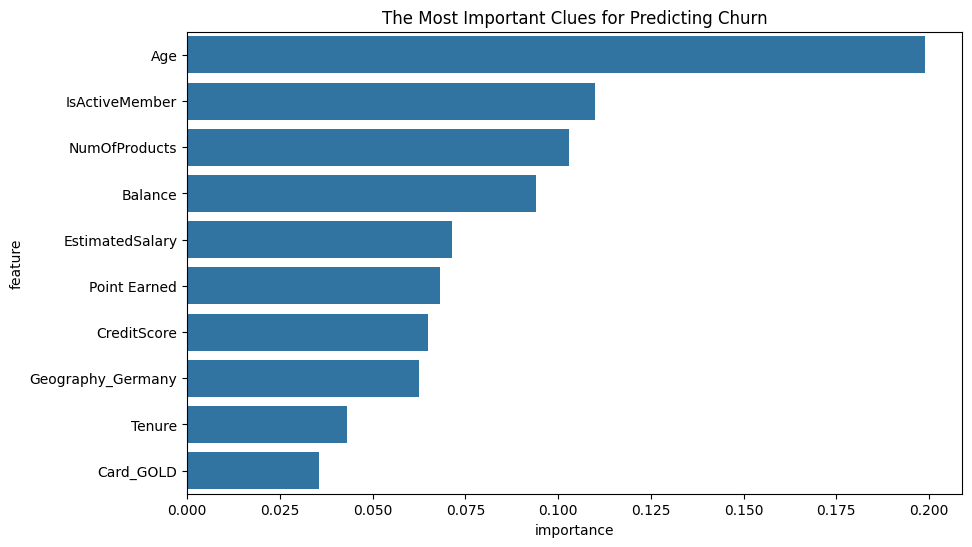

In [ ]:
importances = best_forest.feature_importances_
feature_names = x.columns

feature_importance_df = pandas.DataFrame({'feature': feature_names, 'importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

plt.figure(figsize=(10, 6))
seaborn.barplot(x='importance', y='feature', data=feature_importance_df.head(10))
plt.title('The Most Important Clues for Predicting Churn')
plt.show()

In [ ]:
!pip install flask joblib pyngrok
import numpy as np
from pyngrok import ngrok, conf
from flask import Flask, request, render_template

conf.get_default().auth_token = "345vMPg2pp8jatILN4kbVhrygsI_5qmSRSbEiiq34d5uQbzkk"

app = Flask(__name__)

public_url = ngrok.connect(5000).public_url
print(f" * Your app is running on: {public_url} ")
print(" * Go to this URL to see your web form.")

model = joblib.load('best_churn_model.pkl')
scaler = joblib.load('best_scaler.pkl')

@app.route('/')
def home():
    return render_template('index.html')

@app.route('/predict', methods=['POST'])
def predict():
    form_values = request.form

    has_cr_card = float(form_values.get('HasCrCard', '0'))
    is_active_member = float(form_values.get('IsActiveMember', '0'))

    geography_germany = 1 if form_values.get('Geography') == 'Germany' else 0
    geography_spain = 1 if form_values.get('Geography') == 'Spain' else 0
    gender_male = 1 if form_values.get('Gender') == 'Male' else 0
    card_diamond = 1 if form_values.get('CardType') == 'DIAMOND' else 0
    card_gold = 1 if form_values.get('CardType') == 'GOLD' else 0
    card_platinum = 1 if form_values.get('CardType') == 'PLATINUM' else 0
    card_silver = 1 if form_values.get('CardType') == 'SILVER' else 0

    final_features = np.array([[
        float(form_values['CreditScore']),
        float(form_values['Age']),
        float(form_values['Tenure']),
        float(form_values['Balance']),
        float(form_values['NumOfProducts']),
        has_cr_card,
        is_active_member,
        float(form_values['EstimatedSalary']),
        float(form_values['PointsEarned']),
        geography_germany,
        geography_spain,
        gender_male,
        card_diamond,
        card_gold,
        card_platinum,
        card_silver
    ]])

    scaled_features = scaler.transform(final_features)
    prediction = model.predict(scaled_features)

    if prediction[0] == 1:
        result = "Churn"
    else:
        result = "Stay"

    return f"<h1>Prediction Result: The customer will {result}</h1>"

if __name__ == '__main__':
    app.run()

 * Your app is running on: https://reasonable-marx-hawkishly.ngrok-free.dev 
 * Go to this URL to see your web form.
 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug:127.0.0.1 - - [19/Oct/2025 08:10:59] "GET / HTTP/1.1" 200 -
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
INFO:werkzeug:127.0.0.1 - - [19/Oct/2025 08:11:35] "POST /predict HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [19/Oct/2025 08:12:03] "GET / HTTP/1.1" 200 -
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
INFO:werkzeug:127.0.0.1 - - [19/Oct/2025 08:15:46] "POST /predict HTTP/1.1" 200 -
